<h1>Engergy Market Price Analysis (Work in Progress)</h1>

In [2990]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# plots and test for autocorrelation and stationarity
import statsmodels.api as sm
from pylab import rcParams  
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

# ARMA modelling
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [2991]:
# importin oecd consumer price data
df = pd.read_csv('C:\Datasets\Prices\Energy Prices\oecd_cpi_energy.csv')
df.head()  # [5883 rows x 19 columns]

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Q,Quarterly,2015-Q1,Q1-2015,PC,Percentage,0,Units,NaN,NaN,-6.839243,NaN,NaN
1,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Q,Quarterly,2015-Q2,Q2-2015,PC,Percentage,0,Units,NaN,NaN,-5.928185,NaN,NaN
2,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Q,Quarterly,2015-Q3,Q3-2015,PC,Percentage,0,Units,NaN,NaN,-6.787836,NaN,NaN
3,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Q,Quarterly,2015-Q4,Q4-2015,PC,Percentage,0,Units,NaN,NaN,-7.538100,NaN,NaN
4,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Q,Quarterly,2016-Q1,Q1-2016,PC,Percentage,0,Units,NaN,NaN,-4.940178,NaN,NaN


In [2992]:
### cleaning the data

# dropping unnessecary columns
df.drop(['Flags', 'Flag Codes', 'Reference Period','Reference Period Code', 'FREQUENCY'], axis=1, inplace=True)

# checking for NaN
print(df.isnull().sum())
df

LOCATION          0
Country           0
SUBJECT           0
Subject           0
MEASURE           0
Measure           0
Frequency         0
TIME              0
Time              0
Unit Code         0
Unit              0
PowerCode Code    0
PowerCode         0
Value             0
dtype: int64


,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Quarterly,2015-Q1,Q1-2015,PC,Percentage,0,Units,-6.839243
1,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Quarterly,2015-Q2,Q2-2015,PC,Percentage,0,Units,-5.928185
2,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Quarterly,2015-Q3,Q3-2015,PC,Percentage,0,Units,-6.787836
3,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Quarterly,2015-Q4,Q4-2015,PC,Percentage,0,Units,-7.538100
4,DNK,Denmark,CPGREN01,CPI: Energy,GY,Percentage change on the same period of the pr...,Quarterly,2016-Q1,Q1-2016,PC,Percentage,0,Units,-4.940178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,JPN,Japan,CP18GREN,CPI (COICOP 18): Energy,GY,Percentage change on the same period of the pr...,Monthly,2022-04,Apr-2022,PC,Percentage,0,Units,19.146830
5879,JPN,Japan,CP18GREN,CPI (COICOP 18): Energy,GY,Percentage change on the same period of the pr...,Monthly,2022-05,May-2022,PC,Percentage,0,Units,17.137290
5880,JPN,Japan,CP18GREN,CPI (COICOP 18): Energy,GY,Percentage change on the same period of the pr...,Monthly,2022-06,Jun-2022,PC,Percentage,0,Units,16.458130
5881,JPN,Japan,CP18GREN,CPI (COICOP 18): Energy,GY,Percentage change on the same period of the pr...,Monthly,2022-07,Jul-2022,PC,Percentage,0,Units,16.223910


* no missing values or Nan's present

In [2993]:
# printing all the unique contires of the df
print(df['LOCATION'].unique())
print(df['LOCATION'].value_counts())

['DNK' 'GRC' 'HUN' 'MEX' 'NLD' 'NOR' 'PRT' 'SWE' 'CHL' 'COL' 'CRI' 'LVA'
 'CAN' 'BEL' 'IRL' 'FIN' 'LUX' 'POL' 'OECDE' 'EST' 'AUT' 'USA' 'ZAF' 'RUS'
 'ESP' 'ITA' 'ISL' 'G-7' 'EA19' 'AUS' 'NZL' 'LTU' 'CZE' 'JPN' 'SVK' 'CHE'
 'SVN' 'DEU' 'TUR' 'OECD' 'KOR' 'FRA' 'ISR' 'GBR' 'EU27_2020']
CRI          251
JPN          239
DNK          131
BEL          131
ISL          131
CZE          131
GRC          131
CHE          131
SVN          131
EST          131
TUR          131
LUX          131
KOR          131
LVA          131
COL          131
CHL          131
NOR          131
NLD          131
MEX          131
HUN          131
LTU          131
FRA          129
EA19         129
OECD         129
DEU          129
ISR          129
GBR          129
SVK          129
ZAF          129
G-7          129
ITA          129
ESP          129
USA          129
AUT          129
OECDE        129
POL          129
FIN          129
IRL          129
CAN          129
SWE          129
PRT          129
EU27_2020    129
R

* lots of countries present and lots of unique values
* unclear how many time periods as the df holds time in different frequencies

<h5> Splitting Data according to time frequency <h5>

In [2994]:
# splitting df into quaterly, monthly and annual data
quarterly = df.Frequency.str.contains('Quarterly')
monthly = df.Frequency.str.contains('Monthly')
annual = df.Frequency.str.contains('Annual')

# quarterly df
dfq = df[quarterly]

# montly df
dfm = df[monthly]

# annual df
dfa = df[annual]

# printing maximum values of highest inflations
print('The country with the highest quarterly inflation is: \n')
print(dfq[dfq['Value']==dfq['Value'].max()])

print('\n\n The country with the highest monthly inflation is: \n')
print(dfm[dfm['Value']==dfm['Value'].max()])

print('\n\n The country with the highest annual inflation is: \n')
print(dfa[dfa['Value']==dfa['Value'].max()])

The country with the highest quarterly inflation is: 

     LOCATION  Country   SUBJECT      Subject MEASURE  \
3105      TUR  Türkiye  CPGREN01  CPI: Energy      GY   

                                                Measure  Frequency     TIME  \
3105  Percentage change on the same period of the pr...  Quarterly  2022-Q2   

         Time Unit Code        Unit  PowerCode Code PowerCode     Value  
3105  Q2-2022        PC  Percentage               0     Units  148.5883  


 The country with the highest monthly inflation is: 

     LOCATION  Country   SUBJECT      Subject MEASURE  \
3359      TUR  Türkiye  CPGREN01  CPI: Energy      GY   

                                                Measure Frequency     TIME  \
3359  Percentage change on the same period of the pr...   Monthly  2022-06   

          Time Unit Code        Unit  PowerCode Code PowerCode     Value  
3359  Jun-2022        PC  Percentage               0     Units  172.3944  


 The country with the highest annual inflat

* Turkey tops the charts of having the highest energy price increase over annual and quarterly time periods
* Turkey already had inflation problems before the start of the Ukrainian Russian war, so these values come to no surpirse
* Norway, on the otherhand, shows the maximum value of monthly energy price inflation 

In [2995]:
# printing all the unique contires of the df
print(dfq['LOCATION'].unique())
print(dfq['LOCATION'].value_counts())

['DNK' 'GRC' 'HUN' 'MEX' 'NLD' 'NOR' 'PRT' 'SWE' 'CHL' 'COL' 'CRI' 'LVA'
 'AUT' 'USA' 'CAN' 'FIN' 'LUX' 'POL' 'ESP' 'ISL' 'EST' 'AUS' 'NZL' 'G-7'
 'LTU' 'ZAF' 'DEU' 'TUR' 'OECDE' 'JPN' 'BEL' 'OECD' 'IRL' 'FRA' 'RUS'
 'KOR' 'GBR' 'SVN' 'SVK' 'EA19' 'ITA' 'ISR' 'CHE' 'CZE' 'EU27_2020']
CRI          59
JPN          56
DNK          31
TUR          31
LTU          31
GRC          31
KOR          31
EST          31
ISL          31
SVN          31
LUX          31
BEL          31
CZE          31
MEX          31
LVA          31
HUN          31
COL          31
CHL          31
CHE          31
NOR          31
NLD          31
OECD         30
IRL          30
ISR          30
FRA          30
ITA          30
GBR          30
SVK          30
EA19         30
NZL          30
OECDE        30
DEU          30
ZAF          30
G-7          30
AUS          30
ESP          30
POL          30
FIN          30
CAN          30
USA          30
AUT          30
SWE          30
PRT          30
EU27_2020    30
RUS        

<function matplotlib.pyplot.show(close=None, block=None)>

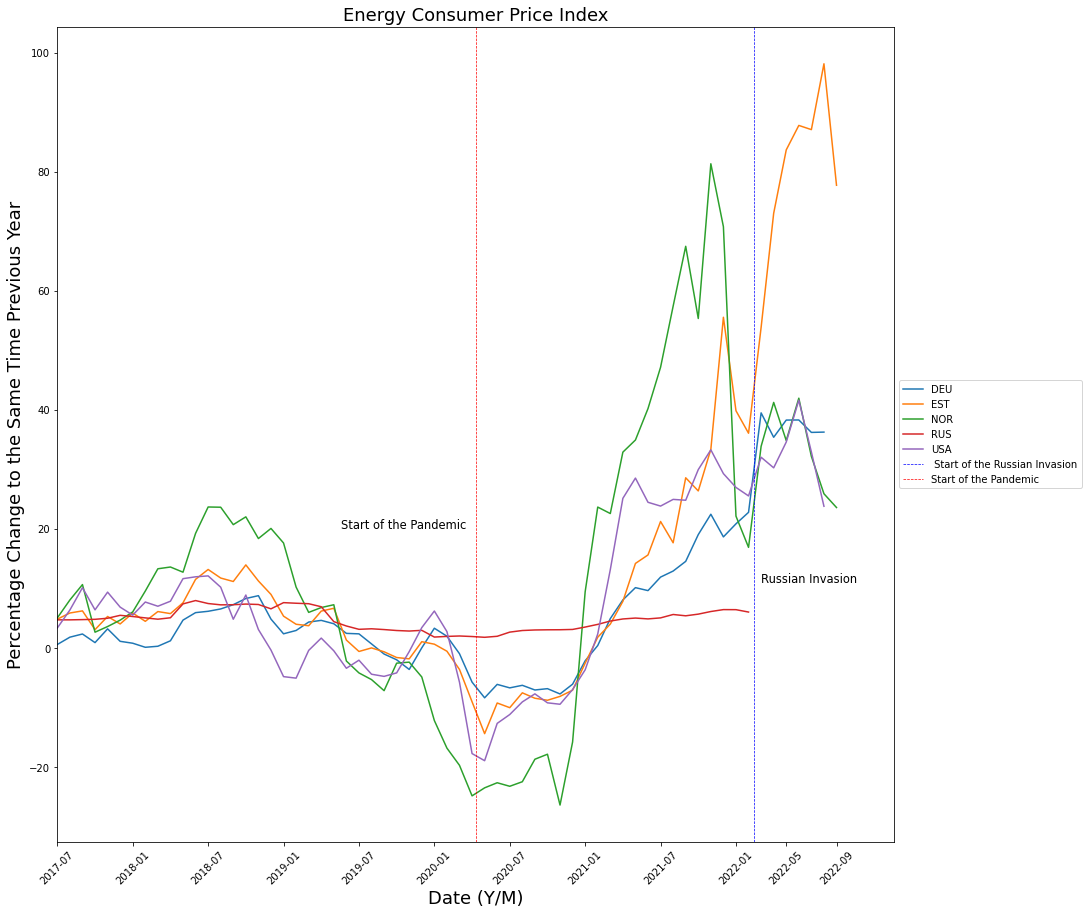

In [2996]:
# creating a sub group of countries
lst = ['USA', 'RUS', 'DEU', 'EST', 'NOR']

g = dfm[dfm['LOCATION'].isin(lst)]

countries = g.groupby('LOCATION')
tick_spacing=1

# plotting the sub group of countries in a line plot overtime
plt.figure(figsize=(15,15))
for key, country in countries:
    plt.plot(country.TIME, country.Value, label=key)
plt.xlim(left=30)
plt.axvline(x = 85.4, color = 'b', label = ' Start of the Russian Invasion', linestyle= 'dashed', linewidth=0.7)    # russian invasion 24.02.22
plt.axvline(x = 63.3, color = 'r', label = 'Start of the Pandemic', linestyle= 'dashed', linewidth=0.7 )
plt.annotate("Start of the Pandemic", (52.6, 20), fontsize=11.5)
plt.annotate("Russian Invasion", (86, 11), fontsize=11.5)
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([30,36,42,48,54,60,66,72,78,84,88,92], rotation = 45)
plt.title('Energy Consumer Price Index', fontsize=18)
plt.xlabel('Date (Y/M)', fontsize = 18)
plt.ylabel('Percentage Change to the Same Time Previous Year', fontsize = 18)
plt.show

* from 2017 to 2019 there was little movement in the energy prices for most countries
* after that energy prices even started to fall until the pandemic
* after the pandemic the fall in energy prices stagnates and increase at the end of 2020 when covid rates that to further stack
* usually energy prices do no increase by more than 30% during a year, but from 2021 onwards energy prices have exploded
* by the end of 2021 Putin employed massive military forces at the boarder of Ukraine, which increased energy prices more, as Russia is an important gas supplier for European countries
* the invasion of Ukraine by Russia amplified all these increases even further and increased energy prices in Latvia by almost 100% to previous year
* interestingly, russians energy price increase has been very stable over the last five years always being around 5%
* since the start of the war russia has not given the OECD any data anymore 

* clearly noticeable big increase in gas prices in the first half of 2021 reaching a price of 0.078

<h4> Relationship of gas price and russian supply to Europe <h4>

In [3000]:
# russian gas import by country
gas_import = pd.read_excel(r'C:\Datasets\Prices\Energy Prices\nrg_ti_gas__import_rus.xlsx', sheet_name = 'Sheet 1')

# cleaning the data
gas_import = gas_import.dropna()

#transposing it so that I can plot it
gas_import = gas_import.transpose()
gas_import.reset_index(inplace=True)
gas_import.columns = gas_import.iloc[0]
gas_import = gas_import[1:]
gas_import

,TIME,European Union - 27 countries (from 2020),Euro area - 19 countries (from 2015),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,...,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina,Kosovo (under United Nations Security Council Resolution 1244/99),Moldova,Ukraine,Georgia
1,2011,121737.661,89246.661,0,2764,9041,0,32859,632,0,...,0,134,0,1478,25407,:,0,1152,39320,:
2,2012,117526.628,87320.628,0,2485,7468,0,32632,657,0,...,0,139,0,976,26490,:,0,1095,32313,:
3,2013,135322.315,105431.315,0,2698,8464,0,39977,678,0,...,0,157,0,1158,26213,:,0,1031,25399,0
4,2014,115288.893,88092.893,0,2683,6550,0,37201,530,0,...,0,134,0,1395,26976,186,0,1053,14204,0
5,2015,124319.536,98430.536,0,3010,7460,0,43626,471,0,...,0,135,0,1740,26784,218,0,1007,6035,0
6,2016,151739.988,119974.988,0,3094,8121,0,58671,518,0,...,0,211,0,1795,24541,227,0,1037,0,0
7,2017,164973.379,128688.555,0,3268.781,8817,0,62079.783,502,0,...,0,271,0,2182.632,28685,245,0,1033.482,0,0
8,2018,154941.455,120719.998,328.3,3111.458,7968.39,0,43108.053,523,0,...,0,251,0,2198.33,23643,244.604,0,1129.7,0,0
9,2019,168859.523,128702.567,1900.8,2342.221,9507.601,0.0,46249.986,481.0,0.0,...,0.0,292.0,0.0,2262.61,15196.0,230.98,0.0,1039.6,0.0,0.0
10,2020,155019.767,122943.872,1409.8,2201.204,7589.967,0,52463.565,206.6,0,...,0,334,0,1989.886,16178.05,210.686,0,1056,0,0


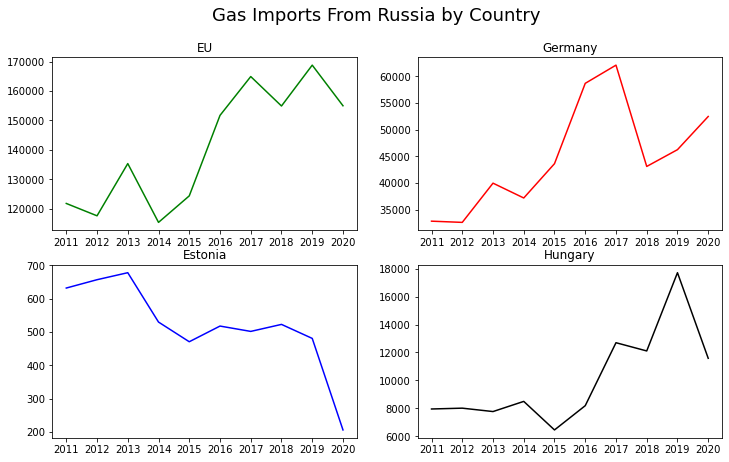

In [3001]:
# plotting gas imports by country

fig, ax = plt.subplots(2, 2, figsize= (12,7))
fig.suptitle('Gas Imports From Russia by Country', fontsize= 18)

# EU
ax[0, 0].plot(gas_import['TIME'], gas_import['European Union - 27 countries (from 2020)'], 'g', label='EU')
ax[0, 0].set_title('EU')

# Germany
ax[0, 1].plot(gas_import['TIME'], gas_import['Germany (until 1990 former territory of the FRG)'], 'r')
ax[0, 1].set_title('Germany')

# Estonia
ax[1, 0].plot(gas_import['TIME'], gas_import['Estonia'], 'b') 
ax[1, 0].title.set_text('Estonia')

# Hungary
ax[1, 1].plot(gas_import['TIME'], gas_import['Hungary'], 'k') 
ax[1, 1].set_title('Hungary')

plt.show()

* EU gas imports have risen since 2014, following the annexion of Crimea
* the increase in EU gas imports are likely driven by imports from Germany as they almost import a third of the whole European gas imports (2020)
* Some eastern European countries have also increased gas imports such as Hungary, who are closely tied to Russia
* while others such as Estonia, who has the highest inflation in the EU have drastical decreased imports by more than 70 percent since 2013


<h4> Natural Gas Price Forcasting <h4>

Overall, we can clearly see that the energy prices have increased drastically not only in Europe, but also in other places around the world such as the US. While the US markets does differ from the European market, they do share some similarities and generell trends tend to be similar. For the most case, the western-northern part of Europe follows a gas-on-gas market just like the US. In such markets, gas prices are set regionally depending on supply and demand. 

Because of the similarity in some parts of the natural gas market, I would now like to make use of American daily natural gas prices to make predictions about future gas price developments, due to the availability of data. We can assume that the generall trend of the american gas price will be similar to the european one, but may differ in magnitude.

In [3002]:
# loading daily gas spot price per million Btu
spot_price = pd.read_excel(r'C:\Datasets\Prices\Energy Prices\gas_daily_spot_price.xls', index_col='Date', sheet_name= 'Data 1')
spot_price.head()

,Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
Date,
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00


Data preperation and cleaning

In [3003]:
spot_price.isnull().sum()

Henry Hub Natural Gas Spot Price (Dollars per Million Btu)    0
dtype: int64

In [3004]:
spot_price.describe()

,Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
count,6481.000000
mean,4.226811
std,2.202176
min,1.050000
25%,2.680000
50%,3.580000
75%,5.320000
max,23.860000


In [3005]:
# ensuring the date column is correctly specified
# spot_price['Date'] = pd.to_datetime(spot_price['Date'], format= '%d/%m/%Y')

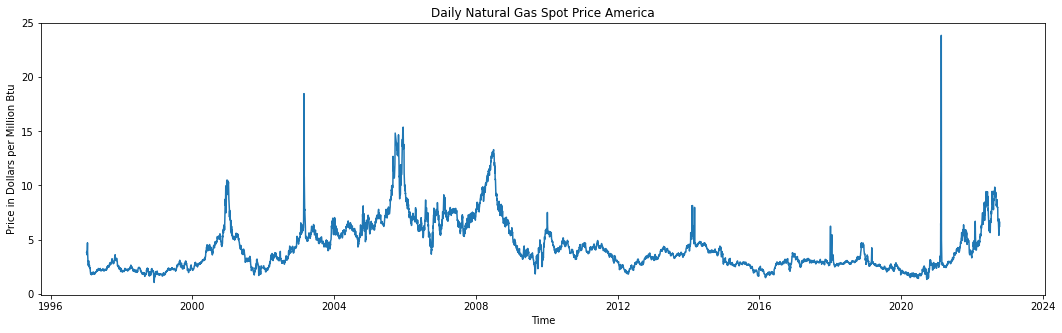

In [3006]:
# plotting daily gas price over time
plt.figure(figsize=(18,5))
plt.plot(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'])
plt.title('Daily Natural Gas Spot Price America')
plt.xlabel('Time')
plt.ylabel('Price in Dollars per Million Btu')
plt.show()

* we can clearly see that since the end of 2020 and beginning of 2021 the gas price follows an upward trend
* also since this is daily data, we can observe some outliers in specific days at which the gas price explodes briefly

Histogram

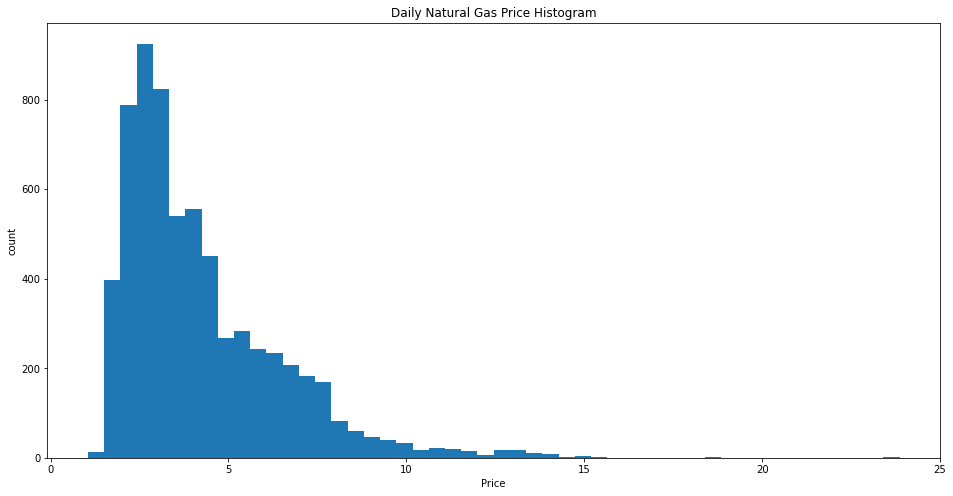

In [3007]:
plt.hist(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'], bins=50)
plt.title('Daily Natural Gas Price Histogram')
plt.ylabel('count')
plt.xlabel('Price')
plt.show()

* the distribution follows a log normal distribution
* with the most frequent price being around 3 dollars per million btu

<h5> Exploring Seasonality in the Data <h5>

Seasonality reduction tools include:

* exponential weighted moving averaging
* differencing
* seasonal decomposition

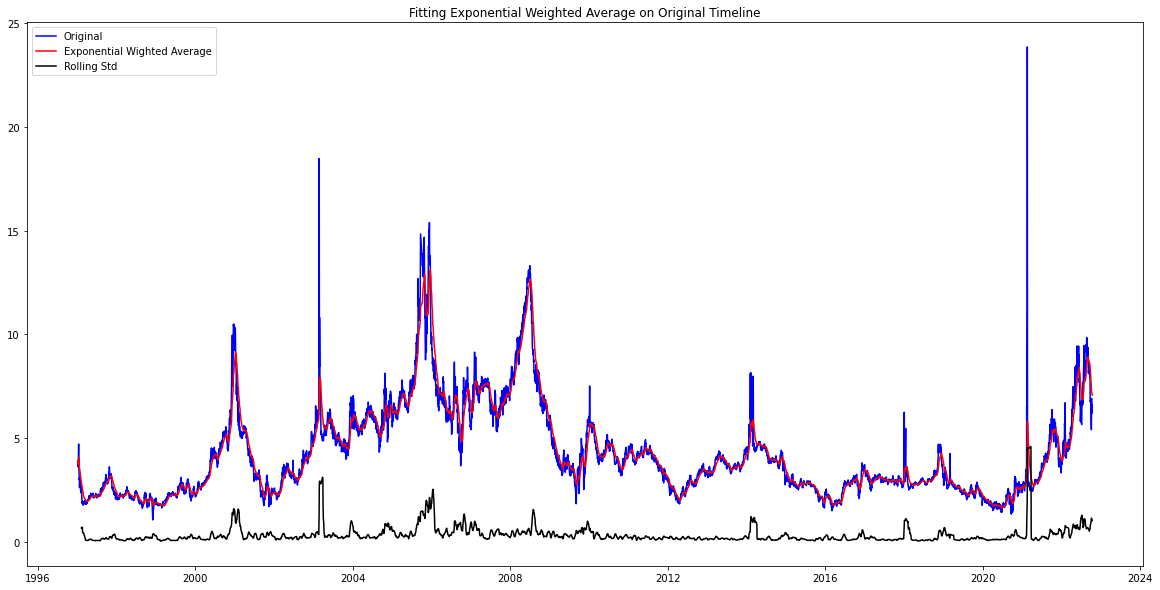

In [3008]:
#price_sqrt = np.sqrt(spot_price)
exp_wma = spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].ewm(span=25).mean()

plt.figure(figsize = (20,10))
orig = plt.plot(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'],  color='blue',label='Original')
mean = plt.plot(exp_wma, color='red', label='Exponential Wighted Average')
std = plt.plot(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].rolling(25).std(), color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Fitting Exponential Weighted Average on Original Timeline')
plt.show()

Seasonal decomposition

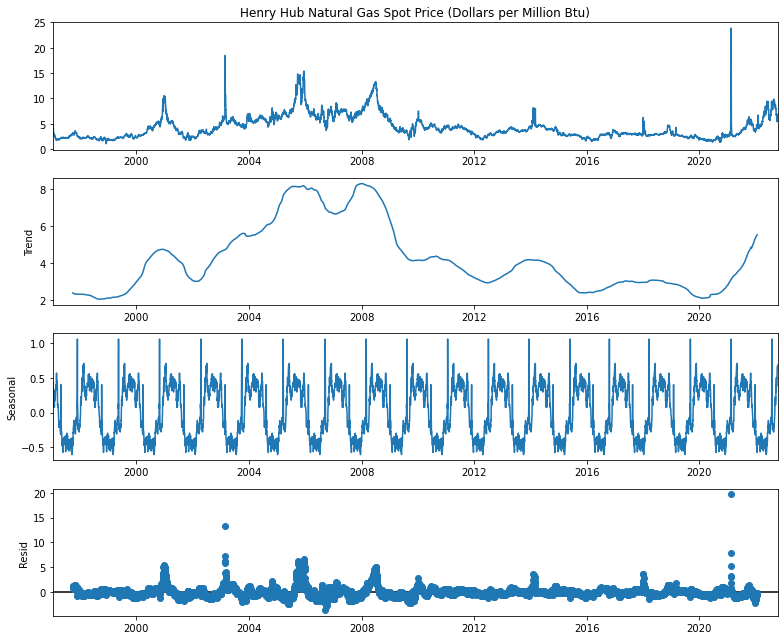

In [3009]:
#setting figure size
rcParams['figure.figsize'] = 11,9

# assuming the gas price follows some seasonality every year
decomposition = sm.tsa.seasonal_decompose(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'], period=365)
fig = decomposition.plot()

plt.show()

* the seasonal decomposition shows that there may be some cyclic trend every year, because of the seasons

<h3> Stationarity and Autocorrelation

Autocorrelation

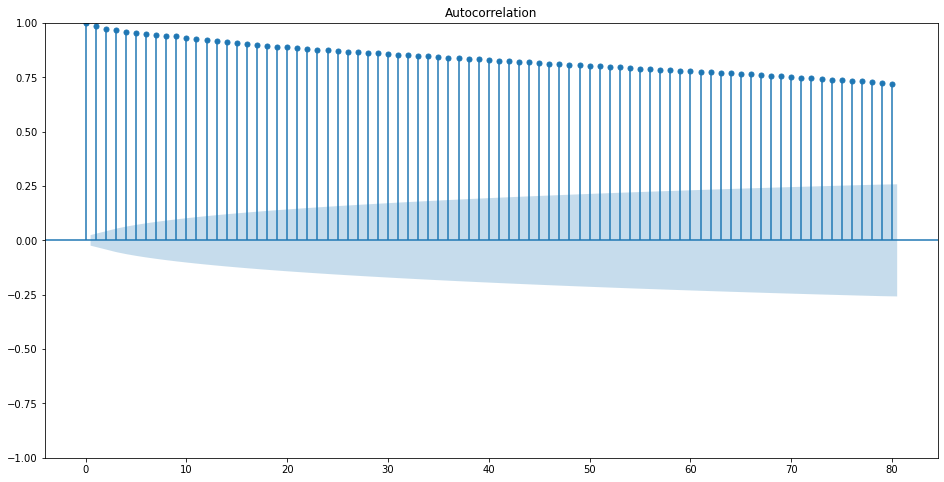

In [3010]:
# sets figure size
plt.rc("figure", figsize=(16,8))

plot_acf(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].dropna(), lags = 80)
plt.show()

* the ACF of the daily gas price drops very slowly and does not reach zero even after 80 lags
* autocorrelated series usually drop to zero relative quickly
* however,the blue field being below all the plotted lags shows that there may be significant autocorrelation

Autocorrelation Test

While looking at plots to determine autocorrelation is a good start, it is best practise to conduct a hypothesis test. The Ljung-Box tests whether a series is autocorrelated or not. Its null hypothesis is that the residuals are independently distributed. While the alternative hypothesis is that the residuals are not independently distributed and exhibit serial correlation.

In [2983]:
# Dicky-Fuller Stationarity Test

print('Dicky-Fuller test results')
res = adfuller(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'])
print(res)

Dicky-Fuller test results
(-3.9587638958003164, 0.0016425131804497285, 7, 6473, {'1%': -3.4313606434619524, '5%': -2.8619866174968744, '10%': -2.567007731184371}, 5198.975789576449)


The p-statistic of the test shows a value of 0.00164. This is suggests stat the data is infact non stationary. However, the evidence from the ACF plot suggests otherwise. As such, we can use differencing to reduce the autocorrelation within the data.

<h4> Differencing

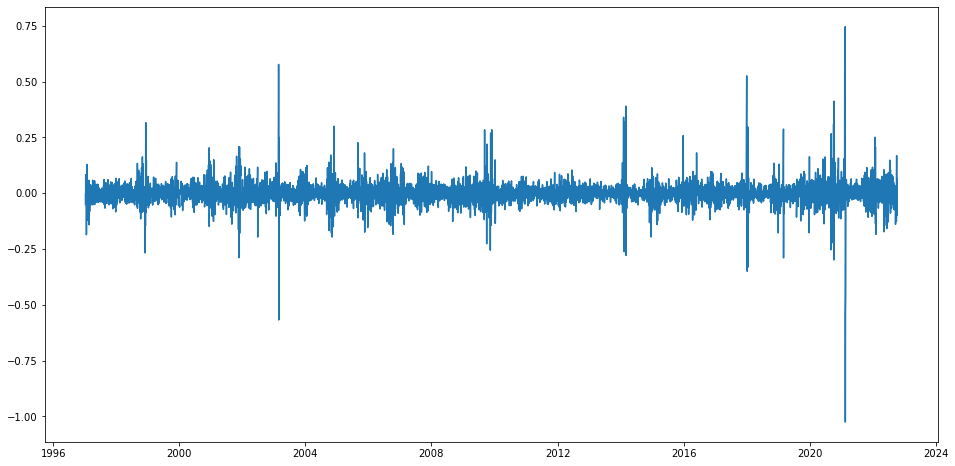

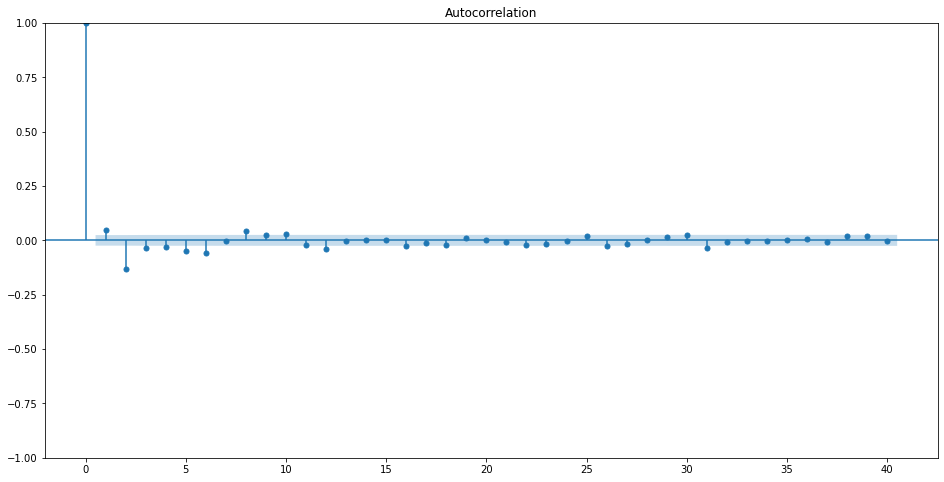

In [2984]:
# using logs to stabilise variance
diff = np.log(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']) - np.log(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].shift())
plt.plot(diff)

# plotting the acf
plot_acf(diff.dropna(), lags = 40)
plt.show()

* the ACF of the differenced daily gas consumption shows significant autocorrelation for the first few lags, but this signficance drops and vanishes very quickly and much quickier than in the normal dataset

In [2947]:
# perform Ljung-Box test on residuals with lag=10
print(acorr_ljungbox(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].dropna(), lags=[10], return_df=True))

# 5 lags
acorr_ljungbox(spot_price['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].dropna(), lags=[5], return_df=True)

         lb_stat  lb_pvalue
10  59158.330574        0.0


,lb_stat,lb_pvalue
5,30381.74692,0.0


Likewise, for the the non transformed data we reject the null and find that there is no autocorrelation. Moving forward, however, we will use the non differenced dataset as I have achieved the best forcasting results with it.

<h3> Data Modeling

Before we set up our ARMA model we need to slice the data into training and test data.

In [2949]:
# figuring out the start and end of the dataset to split it into test and train data
spot_price.head(2)

,Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
Date,
1997-01-07,3.82
1997-01-08,3.80


In [2950]:
spot_price.tail(2)

,Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
Date,
2022-10-11,6.2
2022-10-12,6.6


In [2951]:
# converting the index to DatetimeIndex for daily data
spot_price.index = pd.DatetimeIndex(spot_price.index).to_period('D')

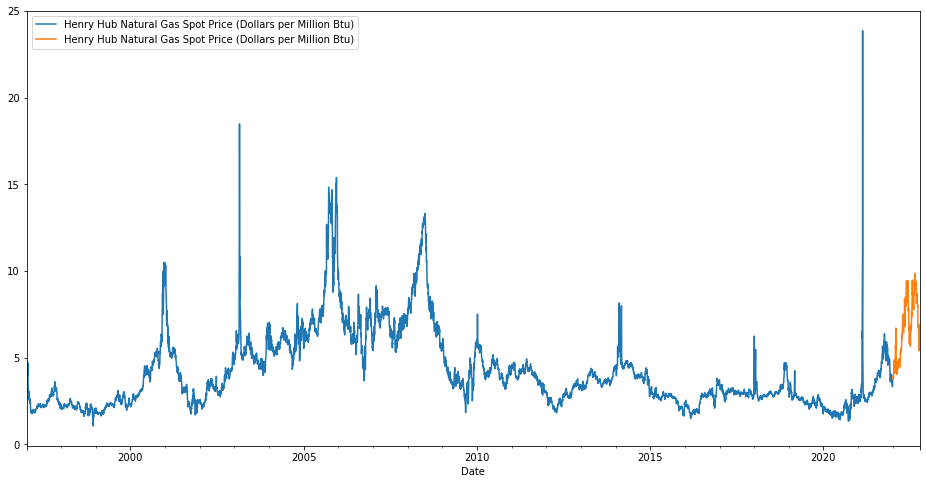

In [2952]:
# Split the data into a train and test set
spot_price_train = spot_price.loc[:'2021']
spot_price_test = spot_price.loc['2022':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
spot_price_train.plot(ax=ax)
spot_price_test.plot(ax=ax)
plt.show()

<h5> ARMA Set Up

The ARMA model (Autoregressive Moving Average Model) is used for forcasting time series data by applying the methods of both autoregression (AR) and moving averages (MA). Here we will make use of statsmodel's ARIMA function for Autoregressive Integrated Moving Averages. An ARIMA(p,I,q) takes on three arguments and equals the ARMA(p,q) model if the second argument I = 0.

In [2953]:
# converting the index to DatetimeIndex for daily data
spot_price.index = pd.DatetimeIndex(spot_price.index).to_period('D')

To determine the ordering of our ARMA(p,q) model we have to:
1. choose the model with the lowest AIC
2. run a Ljung Box Test

We will do this by looping through models with different p and q to then calculate calculate the AIC and choose the ordering with the highest AIC.

In [2955]:
# arma model loop

# list to store the AIC values
AIC = [float('inf')]
model_order = [0,0,0]

for i in range(0,8):
     for j in range(0,8):
         arma_test = ARIMA(spot_price_train, order=(i,0,j)).fit()
         if arma_test.aic < AIC:
             AIC[0] = arma_test.aic
             model_order[0] = i
             model_order[2] = j
      
print(AIC, model_order)

In [2957]:
# printing summary statistics of our model
arma_model = ARIMA(spot_price_train, order=(3,0,6))
model_fit = arma_model.fit()
print(model_fit.summary())

                                                   SARIMAX Results                                                    
Dep. Variable:     Henry Hub Natural Gas Spot Price (Dollars per Million Btu)   No. Observations:                 6286
Model:                                                         ARIMA(3, 0, 6)   Log Likelihood               -2484.937
Date:                                                        Tue, 25 Oct 2022   AIC                           4991.873
Time:                                                                14:58:31   BIC                           5066.080
Sample:                                                            01-07-1997   HQIC                          5017.583
                                                                 - 12-31-2021                                         
Covariance Type:                                                          opg                                         
                 coef    std err          z     

Most of our variables are statistically significant expect for ma lag 5 and 6. Now whats left to do is to plot the corelogram of the residuals of our preferred model to see if they look like a discrete white noise distribution. 

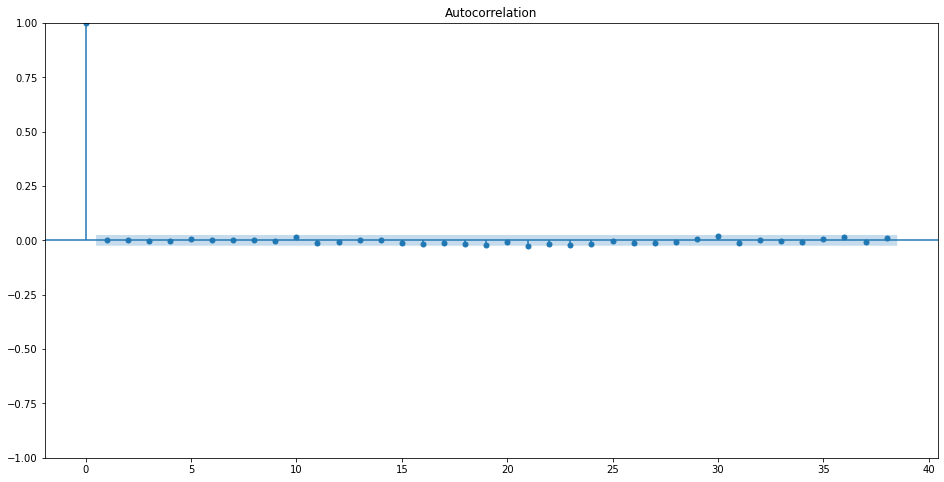

In [2958]:
residuals = model_fit.resid.values
plot_acf(residuals)
plt.show()

The ACF plot looks just like discrete white noise!

Finally, we perform the Ljung-Box test on the residuals of our fitted model. The null hypothesis is that the data is independently distributed, while the alternative is that the data is not independently distributed and thus, exhibits serial correlation.

In [2959]:
# perform Ljung-Box test on residuals with lag=20
acorr_ljungbox(model_fit.resid, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,11.21698,0.9404


The large p-value suggests that the model's residuals are independently distributed and our model has a good fit!

<h5> Predictions

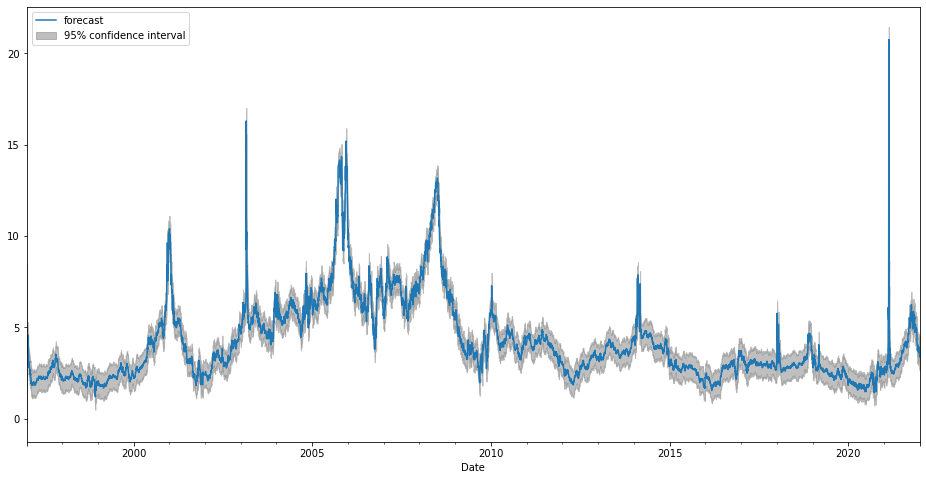

In [2987]:
plot_predict(model_fit_1, dynamic=False)
plt.show()

The model does well on our training data, which is to expected.

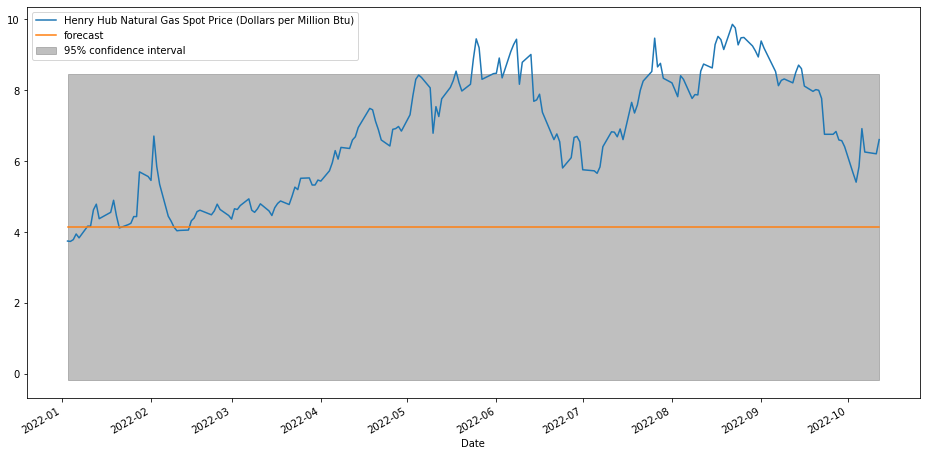

In [2988]:
# plot train, test and prediction
fig, ax = plt.subplots()
ax = spot_price.loc['2022':].plot(ax=ax)
plot_predict(model_fit_1, '2022-01-03', '2022-10-12', ax=ax)
plt.show()

However, when we use the model to forecast the test data the results are not as good.

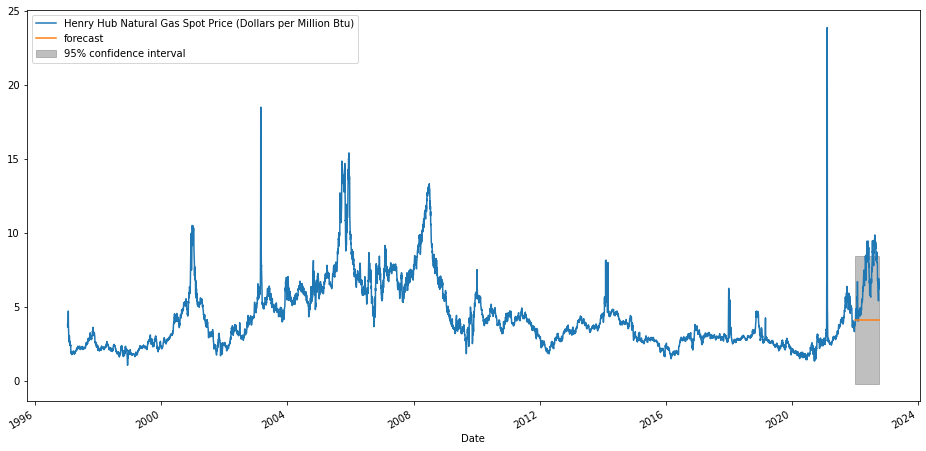

In [2989]:
fig, ax = plt.subplots()
ax = spot_price.plot(ax=ax)
plot_predict(model_fit_1, '2022-01-03', '2022-10-12', ax=ax)
plt.show()